In [1]:
# Importing Dependencies : 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset : 
df = pd.read_csv('data.csv')
df.head(3)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505


#### understanding the data - columns : 
1. Email - unique email of the user (only 1 email per person)
2. Address - address of the user. 
3. Avatar - profile pic of the user. 
4. Avg.Session Length - In store session length 
5. Time on App - time in minutes spent on the app. 
6. time on website - time in minutes spent on website. 
7. length of membership - for how long the customer is with store. 
8. yearly amount spent - target variable. 

In [4]:
# Basic overview of the data 
print(f"No.of Rows : {df.shape[0]}, and No.Of Columns : {df.shape[1]}\n")
print(f"Basic Information of the data : {df.info()}\n")
print(f"Descriptive statistics of the numerical columns :\n {df.describe()}\n")
print(f"No.of Null values : {df.isnull().sum()}\n")
print(f"No.of Duplicates : {df.duplicated().sum()}\n")

No.of Rows : 500, and No.Of Columns : 8

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB
Basic Information of the data : None

Descriptive statistics of the numerical columns :
        Avg. Session Length  Time on App  Time on Website  \
count           500.000000   500.000000       500.000000   
mean             33.053194    12.052488        37.060445   
std               0.992

In [5]:
# Basic Understanding of each column : 
print(f"No.of Columns : {df.shape[1]}\nNames of the columns : {df.columns}")
print(f"\nUnderstanding Categorical variables :\n")
for col in df.select_dtypes(include='object').columns:
    print(len(df[col].unique()))


No.of Columns : 8
Names of the columns : Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

Understanding Categorical variables :

500
500
138


In [6]:
# These three categorical variables are not much influencial on yearly amout spent. 
# Decision made : drop the three categorical columns. 
ds = df.drop(columns=df.select_dtypes(include='object').columns, axis=1)

In [7]:
ds.head(3)

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505


In [8]:
# These feature names have spaces. I want to change them. 
ds = ds.rename(columns= {'Avg. Session Length':'avg_session_length',
                         'Time on App': 'time_spent_on_app', 
                         'Time on Website':'time_spent_on_website',
                         'Length of Membership':'membership_years', 
                         'Yearly Amount Spent': 'yearly_amount_spent' })

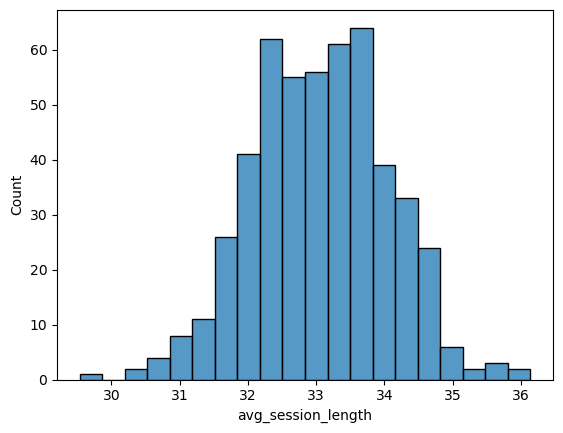

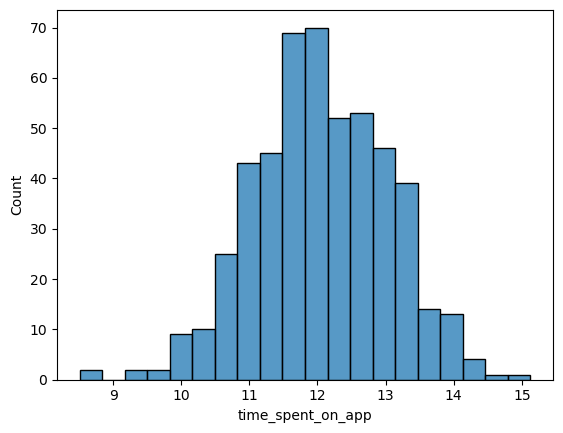

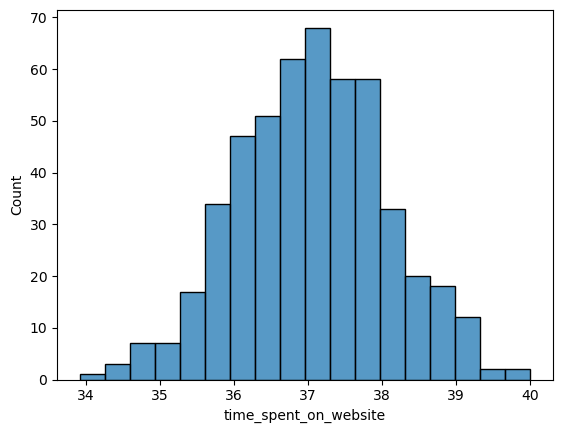

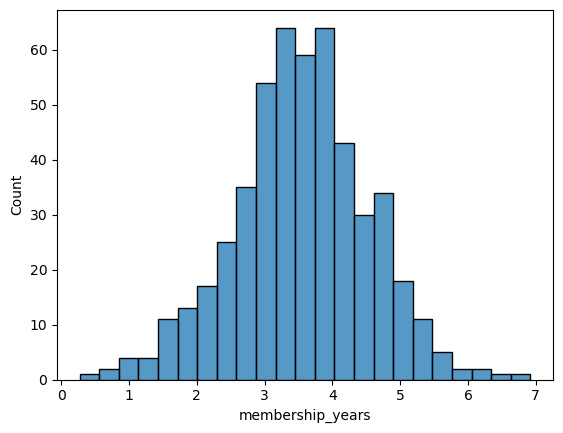

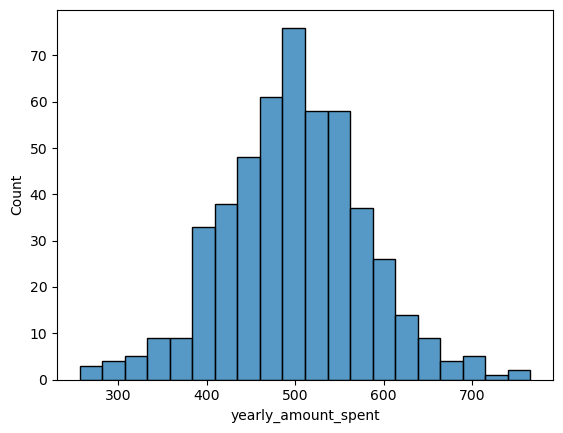

In [9]:
# EDA - Univariate Analysis : 
# 1. avg_session_length 
for col in ds.columns:
    sns.histplot(data=ds, x=col)
    plt.show() 

In [10]:
# Skewness of the each columns : 
for i in ds.columns:
    print(f"{i} Skewness = {ds[i].skew()}\n")

avg_session_length Skewness = -0.03217480705175727

time_spent_on_app Skewness = -0.08912109751093247

time_spent_on_website Skewness = 0.012141880271484171

membership_years Skewness = -0.10660805308864045

yearly_amount_spent Skewness = 0.03479018411523428



Insight : 
All the column distributions are very nearly to normal distribution. 

<Figure size 500x500 with 0 Axes>

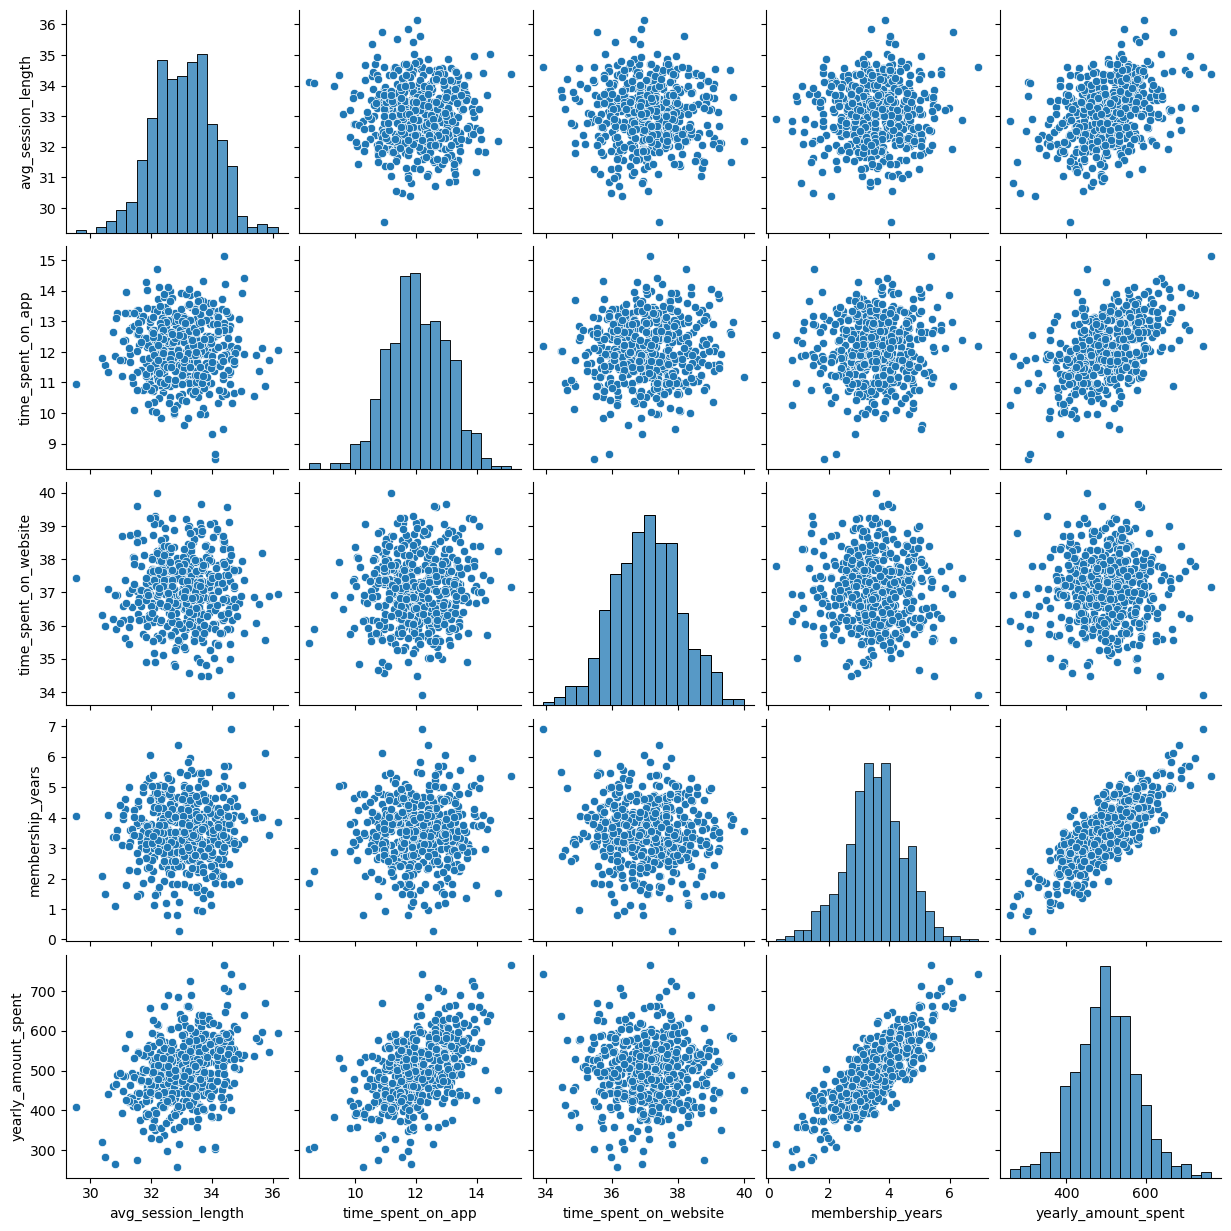

In [12]:
# Multivariate EDA : 
plt.figure(figsize=(5,5))
sns.pairplot(ds)

Insights : We can see that these columns : avg_session_length, time_spent_on app are quite linear relation.

membership_years column is very much linearly related to yearly_amount_spent.

Hence we can say that we can apply Linear regression on this.

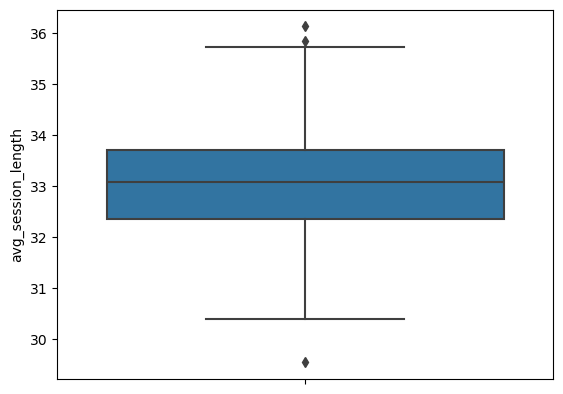

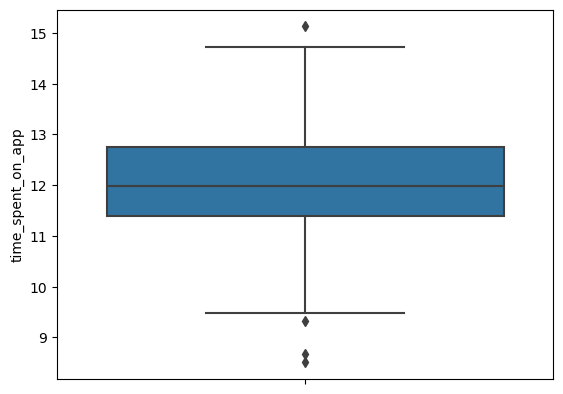

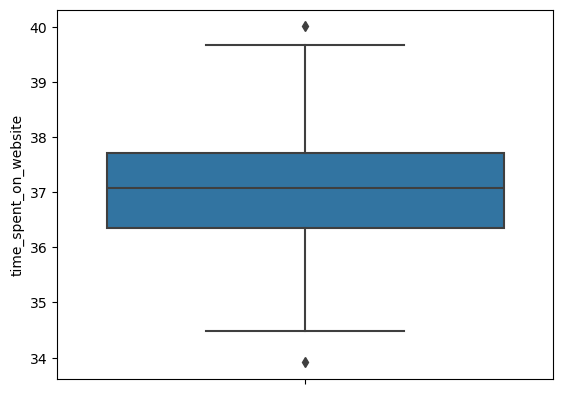

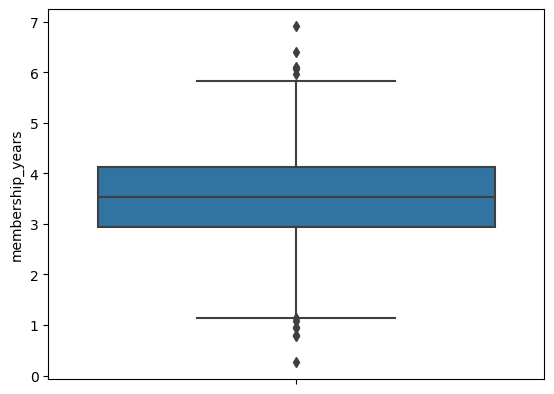

In [14]:
# Outlier Analysis : 
columns = [col for col in ds.columns if col != 'yearly_amount_spent']
for col in columns: 
    sns.boxplot(data=ds, y=col) 
    plt.show()

In [15]:
# FE 
# 1. Handling outliers using IQR method : 
q1 = ds.quantile(0.25)
q3 = ds.quantile(0.75)
iqr = q3 - q1 
lb = q1 - 1.5 * iqr 
ub = q3 + 1.5 * iqr 
ds = ds[~((ds < lb) | (ds > ub)).any(axis=1)]

In [16]:
ds.shape

(476, 5)

IQR method removed 24 rows which contained outliers. 

##### As we have decided that we will be using Linear regression model to train our data. 
##### We have to adhere to all the assumptions of Linear regression. 
1. Linear data - done. 
2. No outliers - done (solved the issue) 
3. No Multicolinearity - 

In [21]:
# Checking Multicollinearity : 
from statsmodels.stats.outliers_influence import variance_inflation_factor 
import statsmodels.api as sm 

X = ds.drop('yearly_amount_spent', axis=1)
X = sm.add_constant(X)

vif_data = pd.DataFrame() 
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [23]:
vif_data

,feature,VIF
0,const,2796.523836
1,avg_session_length,1.001601
2,time_spent_on_app,1.008345
3,time_spent_on_website,1.006150
4,membership_years,1.004977


We are getting vif value as 1 (which is very less to say that data have multicollinearity)

In [26]:
# correlation : 
corr = ds.corrwith(ds['yearly_amount_spent'])
corr

avg_session_length       0.339804
time_spent_on_app        0.475560
time_spent_on_website    0.000581
membership_years         0.767651
yearly_amount_spent      1.000000
dtype: float64

1. From correlation method, the most contributing feature is membership_years, time spent on app, then avg session length
2. Whereas time spend on website has zero to very little contribution.
3. It wouldnt be matter if we drop this column. 

# Feature selection using RFE 
1. RFE iteratively selects features importance and then removes the least important ones. 
2. It starts by training a model (Let's select Linear Regression as our dataset adhere to all of its assumptions)
3. After the training it ranks all the features based on the importance. 
4. The least important one is eliminated.
5. This process is repeated until the no.of features == what we defined. 

In [30]:
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LinearRegression 

X = ds.drop('yearly_amount_spent', axis=1)
y = ds['yearly_amount_spent']

model = LinearRegression()

rfe = RFE(estimator=model, n_features_to_select=3)

rfe.fit(X,y)

ranking = rfe.ranking_

selected_features = X.columns[rfe.support_]

print(ranking)
print(selected_features)

[1 1 2 1]
Index(['avg_session_length', 'time_spent_on_app', 'membership_years'], dtype='object')


In [32]:
# We have selected 3 features. 
# Now let's use these featturese to train the model. 
new_ds = ds[selected_features]
new_ds['yearly_amount_spent'] = ds['yearly_amount_spent']

In [34]:
new_ds.head(3)

,avg_session_length,time_spent_on_app,membership_years,yearly_amount_spent
0,34.497268,12.655651,4.082621,587.951054
1,31.926272,11.109461,2.664034,392.204933
2,33.000915,11.330278,4.104543,487.547505


### Model

In [36]:
X = new_ds.drop('yearly_amount_spent', axis=1)
y = new_ds['yearly_amount_spent']

In [38]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Scaling the X_train and X_test : 
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
# model training : 
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

models={
    'Linear Regression':LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'ElasticNet' : ElasticNet()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{name} model : MAE = {mae:.2f}, MSE = {mae:.2f}, R2 = {r2:.2f} ")

Linear Regression model : MAE = 8.07, MSE = 8.07, R2 = 0.98 
Lasso model : MAE = 8.25, MSE = 8.25, R2 = 0.98 
Ridge model : MAE = 8.08, MSE = 8.08, R2 = 0.98 
ElasticNet model : MAE = 22.21, MSE = 22.21, R2 = 0.85 


In [44]:
# We have selected Linear reggression for this case. 
best_model = LinearRegression()
best_model.fit(X_train_scaled, y_train)
y_pred = best_model.predict(X_test_scaled)

In [59]:
# Testing the model. 
input_data = np.array([33.000915,	11.330278,	4.104543]).reshape(1,-1)
scaled_input = scaler.transform(input_data)
best_model.predict(scaled_input)

array([505.04338401])

In [61]:
# Save our Model : 
import pickle

In [63]:
# pickle the scaler. 
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)


In [65]:
# pickle the model 
with open('model.pkl', 'wb') as model_file: 
    pickle.dump(best_model, model_file)

In [67]:
# Use the saved model : 
with open('scaler.pkl', 'rb') as scaler_file:
    loaded_scaler = pickle.load(scaler_file)

with open('model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)


In [69]:
data = np.array([33.000915,	11.330278,	4.104543]).reshape(1,-1)
data_scaled = loaded_scaler.transform(data)
loaded_model.predict(data_scaled)

array([505.04338401])